# From a Bayesian network to a Classifier

This notebook shows how to build a classifier from an Bayesian network (and not from a database).

| | | |
|-|-|-|
|[ ![Creative Commons License](images/cc4.png)](http://creativecommons.org/licenses/by-nc/4.0/) |[ ![aGrUM](images/logoAgrum.png)](https://pyagrum.gitlab.io) |[ ![interactive online version](images/atbinder.svg)](https://mybinder.org/v2/gl/agrumery%2FaGrUM/forBinder?urlpath=%2Fdoc%2Ftree%2Fwrappers%2Fpyagrum%2Fdoc%2Fsphinx%2Fnotebooks%2F55-Classifier_BinaryAndNaryClassifierFromBN.ipynb)

In [1]:
import pyagrum as gum
import pyagrum.skbn as skbn
import pyagrum.lib.notebook as gnb

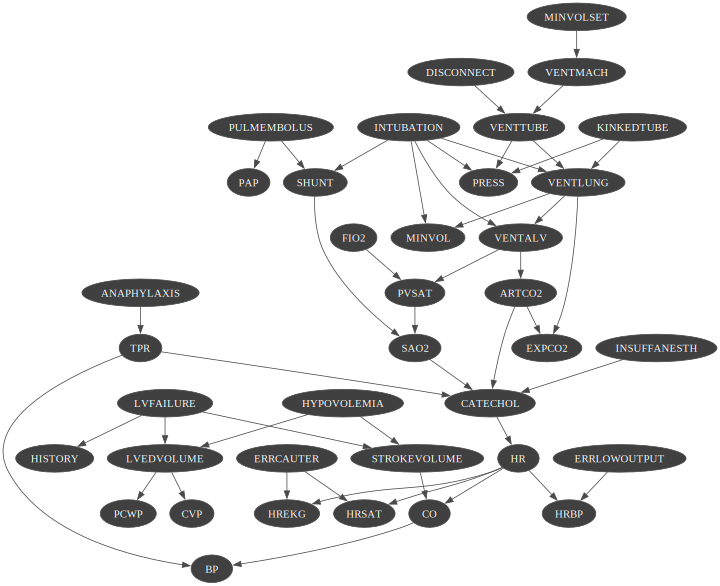

HR:Labelized({LOW|NORMAL|HIGH})


In [2]:
bn = gum.loadBN("res/alarm.dsl")
gnb.showBN(bn, size="10")
print(bn.variable("HR"))

Let's say that you would like to use this Bayesian network to learn a classifier for the class HR (3 classes)

In [3]:
# generating the base of 100 values for testing purpose
print(f"LL(alarm-100)={gum.generateSample(bn, 100, 'out/alarm-100.csv')}")

LL(alarm-100)=-1440.3001764984908


Binary classifier : False


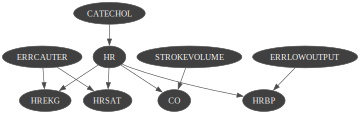

predicted : [np.str_('HIGH'), np.str_('HIGH'), np.str_('HIGH'), np.str_('HIGH'), np.str_('HIGH'), np.str_('HIGH'), np.str_('NORMAL'), np.str_('HIGH'), np.str_('HIGH'), np.str_('HIGH'), np.str_('HIGH'), np.str_('HIGH'), np.str_('NORMAL'), np.str_('HIGH'), np.str_('HIGH'), np.str_('HIGH'), np.str_('HIGH'), np.str_('HIGH'), np.str_('HIGH'), np.str_('HIGH'), np.str_('HIGH'), np.str_('HIGH'), np.str_('HIGH'), np.str_('HIGH'), np.str_('NORMAL'), np.str_('HIGH'), np.str_('NORMAL'), np.str_('HIGH'), np.str_('HIGH'), np.str_('HIGH'), np.str_('HIGH'), np.str_('NORMAL'), np.str_('HIGH'), np.str_('HIGH'), np.str_('HIGH'), np.str_('HIGH'), np.str_('HIGH'), np.str_('HIGH'), np.str_('HIGH'), np.str_('HIGH'), np.str_('NORMAL'), np.str_('HIGH'), np.str_('HIGH'), np.str_('HIGH'), np.str_('HIGH'), np.str_('HIGH'), np.str_('HIGH'), np.str_('HIGH'), np.str_('HIGH'), np.str_('HIGH'), np.str_('NORMAL'), np.str_('HIGH'), np.str_('HIGH'), np.str_('HIGH'), np.str_('HIGH'), np.str_('HIGH'), np.str_('HIGH'), np.s

In [4]:
bnc = skbn.BNClassifier()
bnc.fromTrainedModel(bn, targetAttribute="HR")
print(f"Binary classifier : {bnc.isBinaryClassifier}")
gnb.showBN(bnc.MarkovBlanket)

xTrain, yTrain = bnc.XYfromCSV(filename="out/alarm-100.csv")
print(f"predicted : {list(bnc.predict(xTrain))}")
print(f"in base   : {yTrain.to_list()}")

In [5]:
print(list(bnc.predict(X="out/alarm-100.csv")))

[np.str_('HIGH'), np.str_('HIGH'), np.str_('HIGH'), np.str_('HIGH'), np.str_('HIGH'), np.str_('HIGH'), np.str_('NORMAL'), np.str_('HIGH'), np.str_('HIGH'), np.str_('HIGH'), np.str_('HIGH'), np.str_('HIGH'), np.str_('NORMAL'), np.str_('HIGH'), np.str_('HIGH'), np.str_('HIGH'), np.str_('HIGH'), np.str_('HIGH'), np.str_('HIGH'), np.str_('HIGH'), np.str_('HIGH'), np.str_('HIGH'), np.str_('HIGH'), np.str_('HIGH'), np.str_('NORMAL'), np.str_('HIGH'), np.str_('NORMAL'), np.str_('HIGH'), np.str_('HIGH'), np.str_('HIGH'), np.str_('HIGH'), np.str_('NORMAL'), np.str_('HIGH'), np.str_('HIGH'), np.str_('HIGH'), np.str_('HIGH'), np.str_('HIGH'), np.str_('HIGH'), np.str_('HIGH'), np.str_('HIGH'), np.str_('NORMAL'), np.str_('HIGH'), np.str_('HIGH'), np.str_('HIGH'), np.str_('HIGH'), np.str_('HIGH'), np.str_('HIGH'), np.str_('HIGH'), np.str_('HIGH'), np.str_('HIGH'), np.str_('NORMAL'), np.str_('HIGH'), np.str_('HIGH'), np.str_('HIGH'), np.str_('HIGH'), np.str_('HIGH'), np.str_('HIGH'), np.str_('HIGH'),

In [6]:
scoreCSV1 = bnc.score("out/alarm-100.csv", y=yTrain)
print("{0:.2f}% good predictions".format(100 * scoreCSV1))

99.00% good predictions


## From a Bayesian network to a Binary classifier

By targetting a specific label, one can create a binary classifier to predict this very target.

In [7]:
bnc = skbn.BNClassifier()
bnc.fromTrainedModel(bn, targetAttribute="HR", targetModality="LOW")
print(f"Binary classifier : {bnc.isBinaryClassifier}")

Binary classifier : True


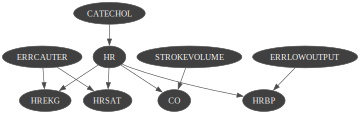

In [8]:
gnb.showBN(bnc.MarkovBlanket)

In [9]:
xTrain, yTrain = bnc.XYfromCSV(filename="out/alarm-100.csv")
print(f"predicted : {list(bnc.predict(xTrain))}")
print(f"in base   : {yTrain.to_list()}")

predicted : [np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False

In [10]:
print(list(bnc.predict(X="out/alarm-100.csv")))

[np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_

In [11]:
scoreCSV1 = bnc.score("out/alarm-100.csv", y=yTrain)
print("{0:.2f}% good predictions".format(100 * scoreCSV1))

99.00% good predictions

LL(alarm-1000)=-14895.97330358777


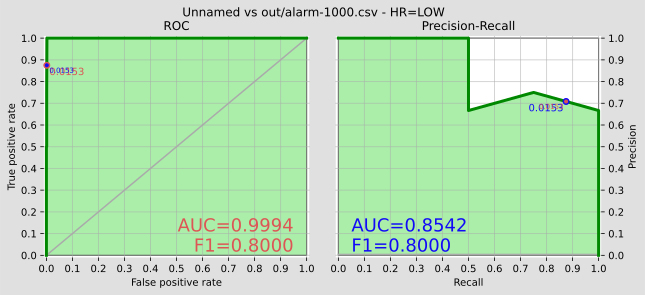

In [12]:
print(f"LL(alarm-1000)={gum.generateSample(bn, 1000, 'out/alarm-1000.csv', with_labels=True)}")
bnc.showROC_PR("out/alarm-1000.csv")

In [13]:
import pyagrum.lib.bn2roc as bn2roc

bn2roc.animROC(bnc.bn, "out/alarm-1000.csv", target="HR", label="LOW")

interactive(children=(IntSlider(value=50, description='rate'), Output(layout=Layout(height='250px'))), _dom_cl…

In [14]:
bn2roc.animPR(bnc.bn, "out/alarm-1000.csv", target="HR", label="LOW")

interactive(children=(IntSlider(value=50, description='rate'), Output(layout=Layout(height='250px'))), _dom_cl…